#   [Py4Hw User Guide](../UserGuide.ipynb)> 1.7 Interfaces
###  [Next: 2.1 Bitwise Logic Operations](../s02/logic.ipynb)

Interfaces are groups of wires semantically related.
Interfaces are point to point (NOT POINT TO MULTIPOINT AS WIRES!)

This is because Interfaces are bidirectional, so 1->n and n<-1 can only resolve into 1<--->1.

Who is the source, and who is the sink generaly depends on what is the majority of wires going in which direction.

Imagine we have an interface like this

<pre>
+----------+         +----------+
|        A |-------->| A        |
| Source B |-------->| B  Sink  |
|        C |<--------| C        |
+----------+         +----------+
</pre>

The Interface class maintains a list with the signals that go from source to sink (A and B) , and another list with the signals that go from sink to source (C).

The Logic class has a method to add all the signals of the interface to the circuit, either as source or sink.

When you create an interface you describe the signals participating in it, and save them in the class.

Then the endpoints can connect to that interface either as source or sink.

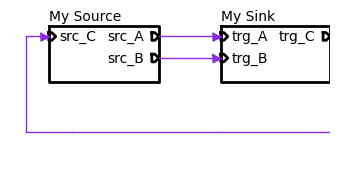

In [3]:
import py4hw 

class Handshake(py4hw.Interface):
    
    def __init__(self, parent, name):
        super().__init__(parent, name)
        
        self.A = self.addSourceToSink('A', 1)
        self.B = self.addSourceToSink('B', 1)
        self.C = self.addSinkToSource('C', 1)
        
        
class Source(py4hw.Logic):
    
    def __init__(self, parent, name, port0):
        super().__init__(parent, name)
        
        self.port0 = self.addInterfaceSource('src', port0)
        
        
class Sink(py4hw.Logic):
    
    def __init__(self, parent, name, port0):
        super().__init__(parent, name)
        
        self.port0 = self.addInterfaceSink('trg', port0)
        
sys = py4hw.HWSystem()

port0 = Handshake(sys, 'port0')

Source(sys, 'My Source', port0)
Sink(sys, 'My Sink', port0)

sch = py4hw.Schematic(sys)
sch.draw()

Now we can have multiple instances in the same object.

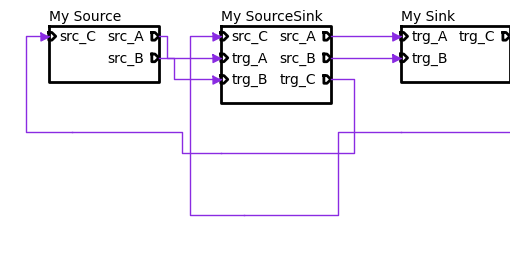

In [8]:
class SourceSink(py4hw.Logic):
    
    def __init__(self, parent, name, port0, port1):
        super().__init__(parent, name)
        
        self.port0 = self.addInterfaceSource('src', port0)
        self.port1 = self.addInterfaceSink('trg', port1)
        
        
sys = py4hw.HWSystem()

port0 = Handshake(sys, 'channel1')
port1 = Handshake(sys, 'channel2')

Source(sys, 'My Source', port0)
SourceSink(sys, 'My SourceSink', port1, port0)
Sink(sys, 'My Sink', port1)

sch = py4hw.Schematic(sys)
sch.draw()